In [1]:
from lblcrn.bulk_crn import *
from lblcrn.crn_sym import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
sm = SpeciesManager()

v_3n_nh2 = sm.sp('v_3n_nh2', Orbital('1s', 535.0))
v_h2 = sm.sp('v_h2', Orbital('1s', 532.2))
v_3n_nh2_2h = sm.sp('v_3n_nh2_2h', Orbital('1s', 530.9))
v_3n_nh3_h = sm.sp('v_3n_nh3_h', Orbital('1s', 530.0))
v_3n_h = sm.sp('v_3n_h', Orbital('1s', 530.0))
v_nh3 = sm.sp('v_nh3', Orbital('1s', 530.0))
v_2n_nh = sm.sp('v_2n_nh', Orbital('1s', 530.0))
v_2n_nh_2h = sm.sp('v_2n_nh_2h', Orbital('1s', 530.0))
v_2n_nh2_h = sm.sp('v_2n_nh2_h', Orbital('1s', 530.0))
v_2n_nh3 = sm.sp('v_2n_nh3', Orbital('1s', 530.0))
v_2n = sm.sp('v_2n', Orbital('1s', 530.0))
v_n2 = sm.sp('v_n2', Orbital('1s', 530.0))
v_2n_n2 = sm.sp('v_2n_n2', Orbital('1s', 530.0))
v_4n = sm.sp('v_4n', Orbital('1s', 530.0))
v_3n_nh_h = sm.sp('v_3nh_h', Orbital('1s', 530.0))
v_3n_nh2 = sm.sp('v_3nh2', Orbital('1s', 530.0))
v_2n_2h = sm.sp('v_2n_2h', Orbital('1s', 530.0))


constants = [7.67e8, 1.41e13, 2.6e6, 2.48e4, 1.03e7, 6.66e2, 1.84e6, 7.2e9, 7.67e8, 3.04e9, 1.6e11, 1.1e6, 1.14e0, 7.79e5,
            3.91e5, 3.14e3, 8.69e6, 4.1e7, 7.2e9, 1.35, 2.77e5, 6.45e8, 1.41e13, 7.67e8, 7.67e8, 1.48e4]
constants = [10e-9 * c for c in constants]
multipliers = [1]

main = XPSInitializationData(
                'High P, High T',
                0,
                0,
                constants=constants
            )

init_data = [main]

def rsys_generator(scaled):
    rsys = RxnSystem(
        RevRxn(v_3n_nh2 + v_h2, v_3n_nh2_2h, scaled[0], scaled[1]),
        RevRxn(v_3n_nh2_2h, v_3n_nh3_h, scaled[2], scaled[3]),
        RevRxn(v_3n_nh3_h, v_3n_h + v_nh3, scaled[4], scaled[5]),
        RevRxn(v_3n_h, v_2n_nh, scaled[6], scaled[7]),
        RevRxn(v_2n_nh + v_h2, v_2n_nh_2h, scaled[8], scaled[9]),
        RevRxn(v_2n_nh_2h, v_2n_nh2_h, scaled[10], scaled[11]),
        RevRxn(v_2n_nh2_h, v_2n_nh3, scaled[12], scaled[13]),
        RevRxn(v_2n_nh3, v_2n + v_nh3, scaled[14], scaled[15]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[16], scaled[17]),
        RevRxn(v_2n_n2, v_4n, scaled[18], scaled[19]),
        RevRxn(v_4n + v_h2, v_3n_nh_h, scaled[20], scaled[21]),
        RevRxn(v_3n_nh_h, v_3n_nh2, scaled[22], scaled[23]),
        RevRxn(v_2n + v_h2, v_2n_2h, scaled[24], scaled[25]),

        Conc(v_n2, 5),
        Conc(v_h2, 15),
        Conc(v_3n_nh2, 1), # 2-20 range
        sm
    )
    return rsys

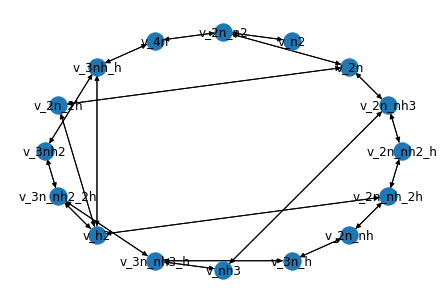

In [3]:
import networkx as nx

rsys = rsys_generator([0]*26)
G = rsys.network_graph()
nx.draw_shell(G, with_labels=True)